In [2]:
import pandas as pd
import numpy as np
from fancyimpute import KNN
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from random import randrange,uniform
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_graphviz               
from sklearn.metrics import accuracy_score            
from sklearn.metrics import confusion_matrix           
from sklearn.ensemble import RandomForestClassifier    
import statsmodels.api as sn                           
from sklearn.neighbors import KNeighborsClassifier     
from sklearn.naive_bayes import GaussianNB             
from sklearn import model_selection                  
from sklearn.metrics import classification_report,roc_auc_score,roc_curve 
from sklearn.metrics import classification_report      
import pickle                                        
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from statsmodels.tools.tools import add_constant
np.random.seed(123) 
pd.options.mode.chained_assignment = None  

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
data = pd.read_csv("heart.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


 -----------------------------------------------------------------------------------

In [0]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

 -----------------------------------------------------------------------------------

In [0]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

In [0]:
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 4] = 'asymptomatic'

In [0]:
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

In [0]:
data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

In [0]:
data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

In [0]:
data['st_slope'][data['st_slope'] == 1] = 'upsloping'
data['st_slope'][data['st_slope'] == 2] = 'flat'
data['st_slope'][data['st_slope'] == 3] = 'downsloping'

In [0]:
data['thalassemia'][data['thalassemia'] == 1] = 'normal'
data['thalassemia'][data['thalassemia'] == 2] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

In [0]:
data['target'][data['target'] == 0] = 'no'
data['target'][data['target'] == 1] = 'yes'

 -----------------------------------------------------------------------------------

In [14]:
type(data)

pandas.core.frame.DataFrame

In [15]:
data.shape

(303, 14)

yes    165
no     138
Name: target, dtype: int64


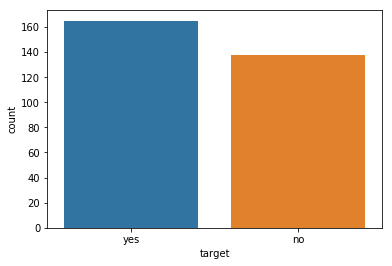

In [16]:
y = data["target"]

sns.countplot(y)


target_temp = data.target.value_counts()

print(target_temp)

In [17]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 54.46
Percentage of patience with heart problems: 45.54


assigning levels to categories

In [0]:
list = []
for i in range(0,data.shape[1]):
  if(data.iloc[:,i].dtypes == 'object'):
    data.iloc[:,i] = pd.Categorical(data.iloc[:,i])
    data.iloc[:,i] = data.iloc[:,i].cat.codes
    data.iloc[:,i] = data.iloc[:,i].astype('object')
    list.append(data.columns[i])

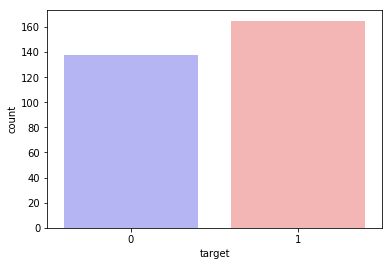

In [19]:
sns.countplot(x='target',data=data,palette="bwr")
plt.show()

In [20]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:31.68%
Percentage of Male Patients:68.32%


In [21]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [22]:
data.groupby('target').mean()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
target,,,,,,
0,56.601449,134.398551,251.086957,139.101449,1.585507,1.166667
1,52.496970,129.303030,242.230303,158.466667,0.583030,0.363636


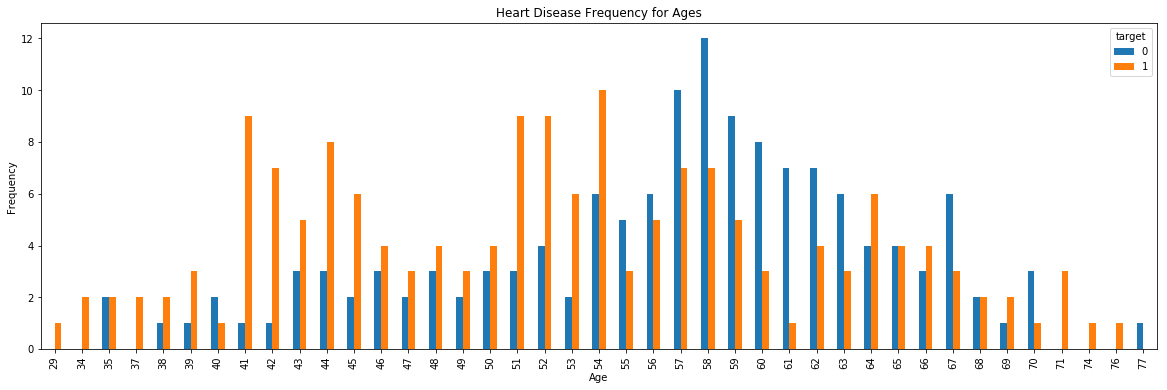

In [23]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

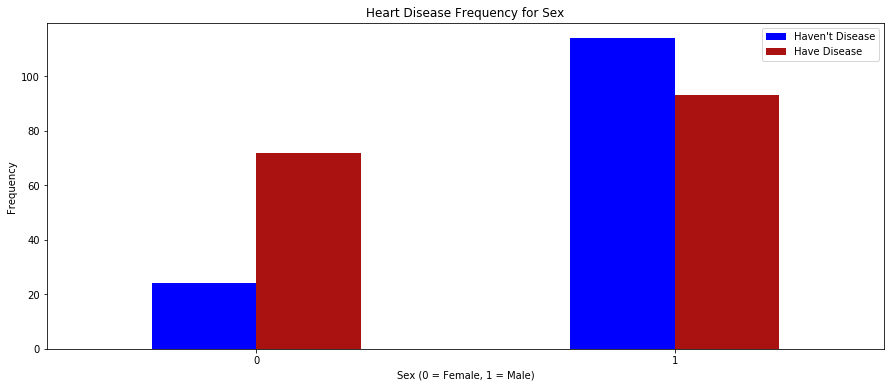

In [24]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [95]:
!pip install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 27.4MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


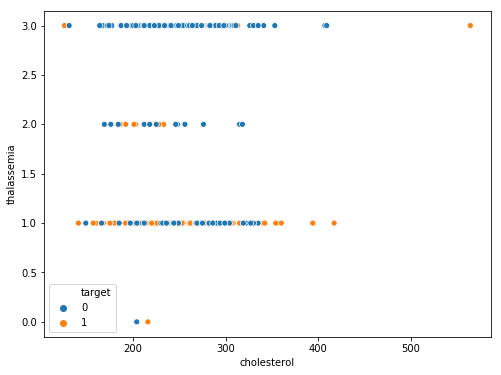

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='cholesterol',y='thalassemia',data=data,hue='target')
plt.show()

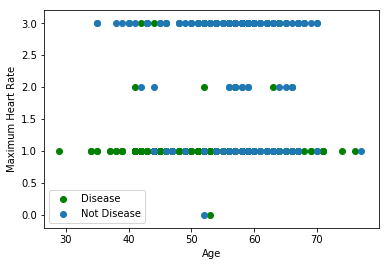

In [26]:
plt.scatter(x=data.age[data.target==1], y=data.thalassemia[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalassemia[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()